<a href="https://colab.research.google.com/github/lawakobadu/Kelompok-1-APM/blob/main/Decision_tree_(ID3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('seattleWeather_1948-2017.csv')
print(data.head(20))

    PRCP  TMAX  TMIN   RAIN VALUE
0   0.47    51    42   True     1
1   0.59    45    36   True     1
2   0.42    45    35   True     1
3   0.31    45    34   True     1
4   0.17    45    32   True     1
5   0.44    48    39   True     1
6   0.41    50    40   True     1
7   0.04    48    35   True     1
8   0.12    50    31   True     1
9   0.74    43    34   True     1
10  0.01    42    32   True     1
11  0.00    41    26  False     0
12  0.00    45    29  False     0
13  0.00    38    26  False     0
14  0.00    34    31  False     0
15  0.00    34    28  False     0
16  0.00    35    29  False     0
17  0.00    33    28  False     0
18  0.00    34    27  False     0
19  0.00    36    29  False     0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25551 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
 4   VALUE   25551 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
data['PRCP'] = data['PRCP'].fillna(0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_names = ['PRCP','TMAX','TMIN']
features = data[feature_names]
data2 = data.VALUE

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, data2, test_size=0.2, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  1.0


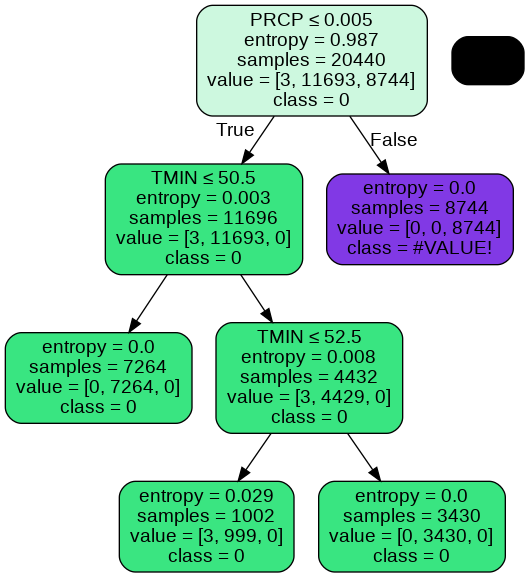

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(clf, out_file=None,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=data2.unique())
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('image.png')
Image(graph.create_png())